# Fossil Fuels in Illinois

This notebook processes data from EIA about all electricity generation in the United States.
We only care about data for Illinois, however.

Data can be found [here](https://www.eia.gov/electricity/data/eia860/) or [here](https://www.eia.gov/electricity/data/eia860M/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
months = ['january',
          'february',
          'march',
          'april',
          'may',
          'june',
          'july',
          'august',
          'september',
          'october',
          'november',
          'december']

In [3]:
url = "https://www.eia.gov/electricity/data/eia860m/archive/xls/december_generator2020.xlsx"
df = pd.read_excel(url, sheet_name='Operating', skipfooter=2, skiprows=2)

In [4]:
illinois_mask = df.iloc[:,5] == 'IL'

In [5]:
illinois_plants = df[illinois_mask]

In [6]:
techs = np.unique(np.array(illinois_plants['Technology']))
techs

array(['All Other', 'Batteries', 'Conventional Hydroelectric',
       'Conventional Steam Coal', 'Landfill Gas',
       'Natural Gas Fired Combined Cycle',
       'Natural Gas Fired Combustion Turbine',
       'Natural Gas Internal Combustion Engine',
       'Natural Gas Steam Turbine', 'Nuclear', 'Onshore Wind Turbine',
       'Other Gases', 'Other Waste Biomass', 'Petroleum Liquids',
       'Solar Photovoltaic'], dtype=object)

In [7]:
for t in techs:
    print(t)
    df = illinois_plants[illinois_plants['Technology'] == t]
    columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
    print(df[columns])
    print('/**************************************************************************/')    
    print('/**************************************************************************/')    
    print('/**************************************************************************/')

All Other
               Plant Name  Nameplate Capacity (MW)  Operating Year  \
15495  Granite City Works                     78.0            2010   

               Status  
15495  (OP) Operating  
/**************************************************************************/
/**************************************************************************/
/**************************************************************************/
Batteries
                                   Plant Name  Nameplate Capacity (MW)  \
15862     FPL Energy Illinois Wind LLC Hybrid                     20.0   
19260            Grand Ridge Battery Projects                      1.5   
19261            Grand Ridge Battery Projects                     31.5   
19263            Elwood Energy Storage Center                     19.8   
19264              Jake Energy Storage Center                     19.8   
19965                 McHenry Battery Storage                     19.8   
21529  TAC-Distributed Energy Resource Hyb

## Illinois Coal Capacity

In [8]:
coaldf = illinois_plants[illinois_plants['Technology'] == 'Conventional Steam Coal']
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_coaldf = coaldf[columns].sort_values(by=['Operating Year'])
sorted_coaldf

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
1482,Joppa Steam,183.3,1953,(OP) Operating
1481,Joppa Steam,183.3,1953,(OP) Operating
1483,Joppa Steam,183.3,1954,(OP) Operating
1484,Joppa Steam,183.3,1954,(OP) Operating
1486,Joppa Steam,183.3,1955,(OP) Operating
1485,Joppa Steam,183.3,1955,(OP) Operating
1470,Waukegan,326.4,1958,(OP) Operating
1471,Waukegan,355.3,1962,(OP) Operating
1676,Marion,33.0,1963,(OP) Operating
1677,Marion,33.0,1963,(OP) Operating


In [9]:
np.unique(np.array(coaldf['Operating Year']))

array([1953, 1954, 1955, 1958, 1962, 1963, 1967, 1968, 1970, 1972, 1973,
       1975, 1977, 1978, 1987, 1989, 1991, 1994, 1997, 1998, 2005, 2009,
       2012])

In [10]:
coaldf['Nameplate Capacity (MW)'].sum()-634.5

10929.5

In [11]:
capacity = np.array(sorted_coaldf['Nameplate Capacity (MW)'])
years = np.array(sorted_coaldf['Operating Year'])

simple_df = pd.DataFrame({'installed':capacity}, index=years)
simple_df.index = pd.to_datetime(simple_df.index, format='%Y')

In [12]:
simple_df = simple_df.resample('Y').sum()

In [13]:
simple_df['capacity'] = simple_df['installed'].cumsum()

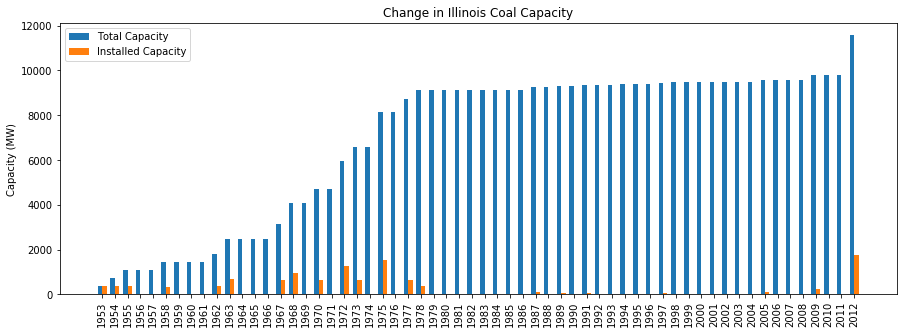

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
years = np.arange(1953,2013,1)
width = 0.35
rects1 = ax.bar(years - width/2, simple_df.capacity, width, label='Total Capacity')
rects2 = ax.bar(years + width/2, simple_df.installed, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Coal Capacity')
ax.set_xticks(years)
plt.xticks(rotation='vertical')
ax.legend()
plt.show()

## Illinois Natural Gas Capacity

In [15]:
natgas = "Natural Gas"
ng_techs = [val for val in techs if natgas in val]
ng_techs

['Natural Gas Fired Combined Cycle',
 'Natural Gas Fired Combustion Turbine',
 'Natural Gas Internal Combustion Engine',
 'Natural Gas Steam Turbine']

In [16]:
test = 'Natural Gas Steam Turbine'
test in ng_techs

True

In [17]:
ng_mask = ((illinois_plants['Technology'] == ng_techs[0]) |
           (illinois_plants['Technology'] == ng_techs[1]) | 
           (illinois_plants['Technology'] == ng_techs[3]) |
           (illinois_plants['Technology'] == ng_techs[3])
           )

In [18]:
natgas_df = illinois_plants[ng_mask]
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_natgas_df = natgas_df[columns].sort_values(by=['Operating Year'])
sorted_natgas_df

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
11648,University of Illinois Abbott Power Plt,3.0,1940,(OP) Operating
11652,University of Illinois Abbott Power Plt,3.0,1940,(OP) Operating
1672,Winnetka,6.3,1948,(OP) Operating
11653,University of Illinois Abbott Power Plt,3.0,1948,(OP) Operating
1455,Grand Tower Energy Center LLC,80.9,1951,(OP) Operating
...,...,...,...,...
12339,Nelson Energy Center,133.1,2015,(OP) Operating
12338,Nelson Energy Center,179.4,2015,(OP) Operating
8030,Alsey,48.0,2016,(OP) Operating
20090,Argonne National Laboratory CHP,6.3,2016,(OP) Operating


In [19]:
sorted_natgas_df['Nameplate Capacity (MW)'].sum()

18623.5

In [20]:
capacity = np.array(sorted_natgas_df['Nameplate Capacity (MW)'])
years = np.array(sorted_natgas_df['Operating Year'])

simple_df = pd.DataFrame({'installed':capacity}, index=years)
simple_df.index = pd.to_datetime(simple_df.index, format='%Y')
simple_df = simple_df.resample('Y').sum()
simple_df['capacity'] = simple_df['installed'].cumsum()

In [21]:
simple_df

,installed,capacity
1940-12-31,6.0,6.0
1941-12-31,0.0,6.0
1942-12-31,0.0,6.0
1943-12-31,0.0,6.0
1944-12-31,0.0,6.0
...,...,...
2015-12-31,627.5,18567.4
2016-12-31,54.3,18621.7
2017-12-31,0.0,18621.7
2018-12-31,0.0,18621.7


In [22]:
simple_df.to_csv('../../data/EIA/illinois_naturalgas_capacity.csv')

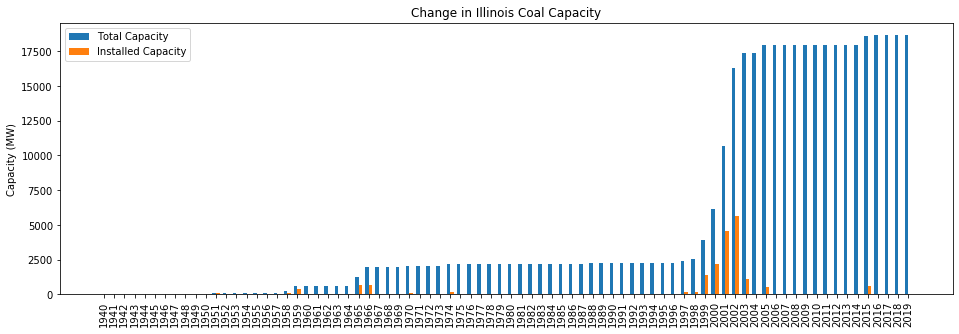

In [23]:
fig, ax = plt.subplots(figsize=(16,5))
years = np.arange(1940,2020,1)
width = 0.35
rects1 = ax.bar(years - width/2, simple_df.capacity, width, label='Total Capacity')
rects2 = ax.bar(years + width/2, simple_df.installed, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Coal Capacity')
ax.set_xticks(years)
plt.xticks(rotation='vertical')
ax.legend()
plt.show()

In [24]:
np.unique(np.array(natgas_df['Operating Year']))

array([1940, 1948, 1951, 1953, 1958, 1959, 1960, 1962, 1965, 1966, 1970,
       1974, 1985, 1987, 1988, 1990, 1991, 1993, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2012, 2015, 2016, 2019])

## Solar Power

In [26]:
solar = 'Solar Photovoltaic'
solardf = illinois_plants[illinois_plants['Technology'] == solar]
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_solardf = solardf[columns].sort_values(by=['Operating Year'])
sorted_solardf

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
15634,Exelon Solar Chicago,9.0,2009,(OP) Operating
16673,Grand Ridge Solar Farm,20.0,2012,(OP) Operating
17740,Rockford Solar Farm,2.6,2012,(OP) Operating
1630,North Ninth Street,0.3,2014,(OP) Operating
1558,Geneseo,1.2,2015,(OP) Operating
22250,Phoenix Solar South Farms LLC Solar Farm,4.7,2015,(OP) Operating
21968,Rantoul Solar,1.0,2016,(OP) Operating
20563,IKEA Joliet Rooftop PV System,2.0,2017,(OP) Operating
21531,TAC-Distributed Energy Resource Hybrid,0.1,2017,(OP) Operating
21415,John A Logan College Solar,1.9,2019,(OP) Operating


In [27]:
sorted_solardf['Nameplate Capacity (MW)'].sum()

116.3